In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tools.image_stitching import *

In [2]:
def load_img(file_path):
    img = cv2.imread(file_path)
    img_g = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    return(img, img_g)

def plot_img(img, cmap=None):
    f, ax = plt.subplots(1, 1, figsize = (15, 10))
    if cmap is None:
        ax.imshow(img)
    else:
        ax.imshow(img, cmap)      
        
def plot_two_img(img1, img2):
    f, ax = plt.subplots(1, 2, figsize = (15, 7))
    ax[0].imshow(img1)
    ax[1].imshow(img2)
    
def mask_to_bbox(mask):
    np.argmin(mask == 1)

In [3]:
fp = r'C:\Users\Matan\Documents\Projects\Data\Slicer\from Roi\15_20_A_16\15_20_A_16'
#fp = r'C:\Users\Matan\Documents\Projects\Data\Slicer\|from Roi\RA_3_A_2\RA_3_A_2'
fp = r'C:\Users\Matan\Documents\Projects\Data\Slicer\from Roi\RA_3_A_3\RA_3_A_3'
#file_list = get_fsi_files(fp)
masks = get_frames_overlap(fp)

In [4]:
masks_hm = get_frames_overlap(fp, method='hm')

In [9]:
mask = masks_hm[1]

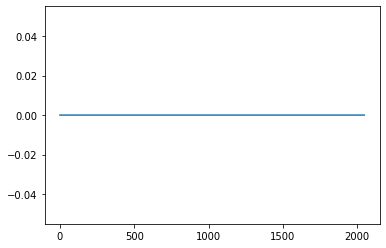

In [14]:
arr = np.argmax(mask==1, axis=1)
plt.plot(arr)

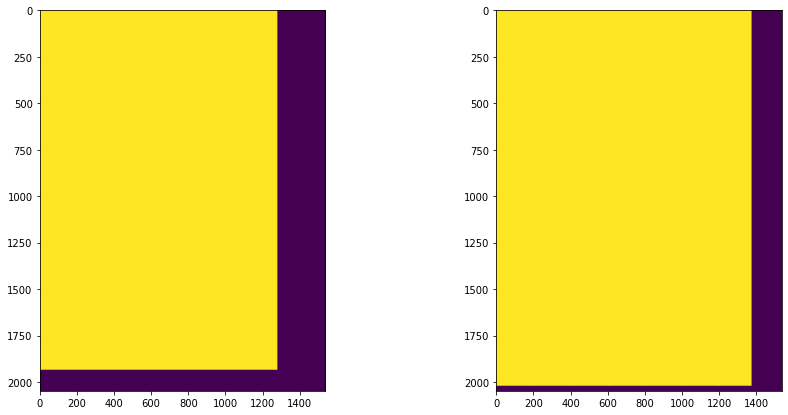

In [15]:
plot_two_img(masks_hm[2],masks[2])

In [16]:
fl = get_fsi_files(fp)
img1 = cv2.imread(os.path.join(fp, fl[2]))
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread(os.path.join(fp, fl[3]))
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

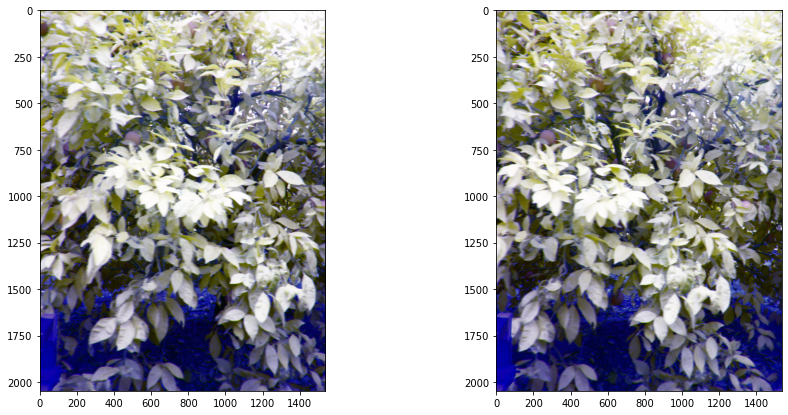

In [17]:
plot_two_img(img1, img2)

In [11]:
fl = get_fsi_files(fp)
im1, r, h, w = load_img(os.path.join(fp, fl[0]))
im2, r, h, w = load_img(os.path.join(fp, fl[1]))

In [15]:
kp1, des1 =find_keypoints(im1)
kp2, des2 =find_keypoints(im2)
match = match_descriptors(des1, des2)

In [16]:
dst_pts = np.float32([kp1[m.queryIdx].pt for m in match]).reshape(-1, 1, 2)
src_pts = np.float32([kp2[m.trainIdx].pt for m in match]).reshape(-1, 1, 2)

In [31]:
warp_mat, s = cv2.estimateAffine2D(np.array(src_pts), np.array(dst_pts))

In [32]:
warp_mat

array([[ 1.04684898e+00,  4.02226698e-03,  7.48987918e+01],
       [-8.87933217e-03,  9.93399366e-01,  8.18583895e+00]])

In [33]:
tx = warp_mat[0,2]
ty = warp_mat[1,2]

In [34]:
tx

74.89879183730898

In [35]:
ty

8.185838947543083

In [25]:
 a=  cv2.estimateRigidTransform(np.array(src_pts), np.array(dst_pts), False)

AttributeError: module 'cv2' has no attribute 'estimateRigidTransform'

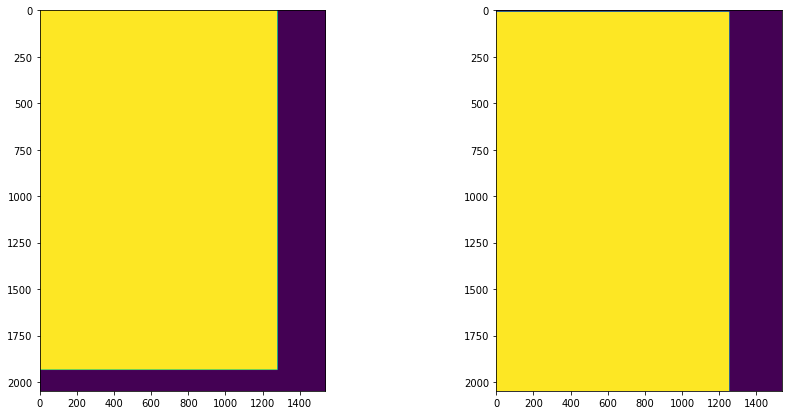

In [17]:
plot_two_img(masks[2], masks[3])

In [13]:
masks.__len__()

6

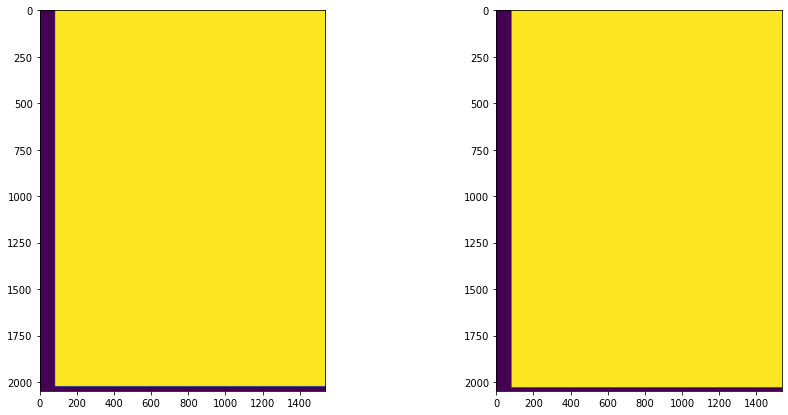

In [6]:
plot_two_img(masks1[2], masks1[3])

In [ ]:
plot_two_img(masks1[0], masks[1])

In [5]:
im1, im1_g = load_img(os.path.join(fp, file_list[0]))
im2, im2_g = load_img(os.path.join(fp, file_list[1]))

In [6]:
sift = cv2.SIFT_create()
kp1, des1 = find_keypoints(sift, im1_g)
kp2, des2 = find_keypoints(sift, im2_g)

In [41]:
good = match_descriptors(des1, des2)

In [42]:
M, mask = calc_homography(kp1, kp2, good)

In [43]:
M[0,2]

68.95986874025354

In [44]:
M[1,2]

-0.7464512382503262

In [9]:
ovl = find_overlapping(im1, im2, M)

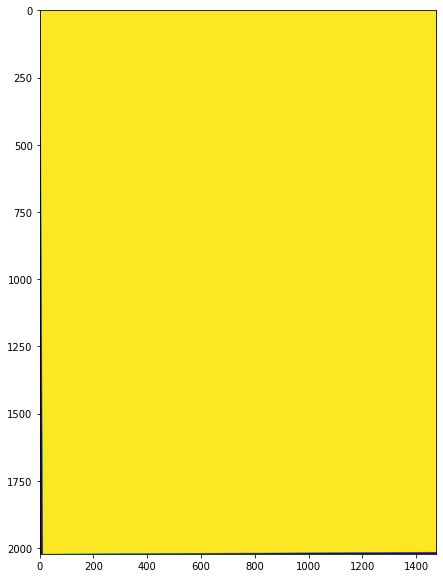

In [10]:
plot_img(ovl)

In [10]:
sift = cv2.SIFT_create()
res = []
filtered = []
im_1, im_1_g = load_img(os.path.join(fp, file_list[0]))
kp1, des1 = find_keypoints(sift, im_1_g)
#for i in range(1, 15): #file_list.__len__()):
for f in file_list[1:]: #file_list.__len__()):
    im_2, im_2_g = load_img(os.path.join(fp, f))
        
    kp2, des2 = find_keypoints(sift, im_2_g)
    match = match_descriptors(des1, des2)
    M, mask = calc_homography(kp1, kp2, match)
    #ovl = find_overlapping(im_1, im_2, M)
    #filtered.append(remove_artifacts(ovl))
    ovl = translation_based(M , im_2.shape[0], im_2.shape[1])
    
    res.append(ovl)
    im_1 = im_2.copy()
    im_1_g = im_2_g.copy()
    kp1 = kp2
    des1 = des2

In [5]:
res.__len__()

7

In [11]:
M[0,2]

-88.89033415243313

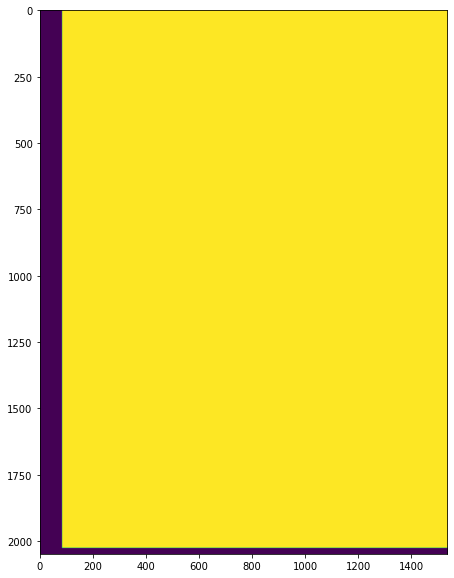

In [14]:
plot_img(res[3])

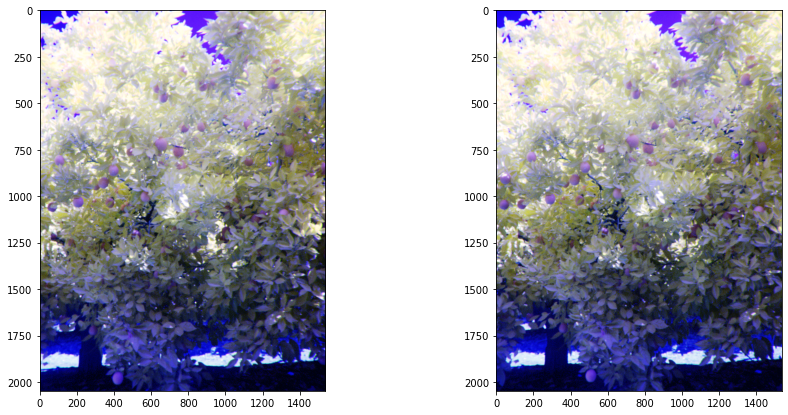

In [15]:
i = 3
t1, _ = load_img(os.path.join(fp, file_list[i]))
t2, _ = load_img(os.path.join(fp, file_list[i+1]))
plot_two_img(t1, t2)

In [10]:
tx = np.int8(M[0, 2])
ty = np.int8(M[1, 2])

In [11]:
tx

-36

In [12]:
ty

8

In [81]:
stitcher = cv2.Stitcher_create()


In [4]:
fp = r'C:\Users\Matan\Documents\Projects\Data\Slicer\from Roi\15_20_A_16\15_20_A_16'
file_list = get_fsi_files(fp)

images = []
for f in file_list:
    t_img, _ = load_img(os.path.join(fp,f))
    r = min(256 / t_img.shape[0], 256
                / t_img.shape[1])
    resized_img = cv2.resize(
        t_img,
        (int(t_img.shape[1] * r), int(t_img.shape[0] * r)),
        interpolation=cv2.INTER_LINEAR,
    ).astype(np.uint8)
    images.append(resized_img)

In [144]:
images.__len__()

24

In [8]:
images[1].shape

(256, 192, 3)

In [6]:
#s,r = stitcher.stitch(images)
#Images = ReadImage("InputImages/Field")

BaseImage, _, _ = ProjectOntoCylinder(images[0])
for i in range(1, len(images[:10])):
#i = 2 
    StitchedImage = StitchImages(BaseImage, images[i])

    BaseImage = StitchedImage.copy()

IndexError: index 0 is out of bounds for axis 1 with size 0

In [9]:
BaseImage, _, _ = ProjectOntoCylinder(images[1])

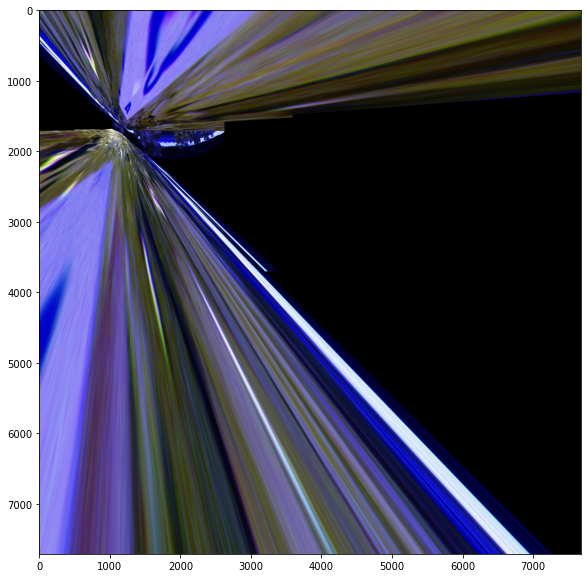

In [148]:
plot_img(BaseImage)

In [126]:
Images[0].shape

(256, 192, 3)

In [85]:
r.shape

(2393, 3658, 3)

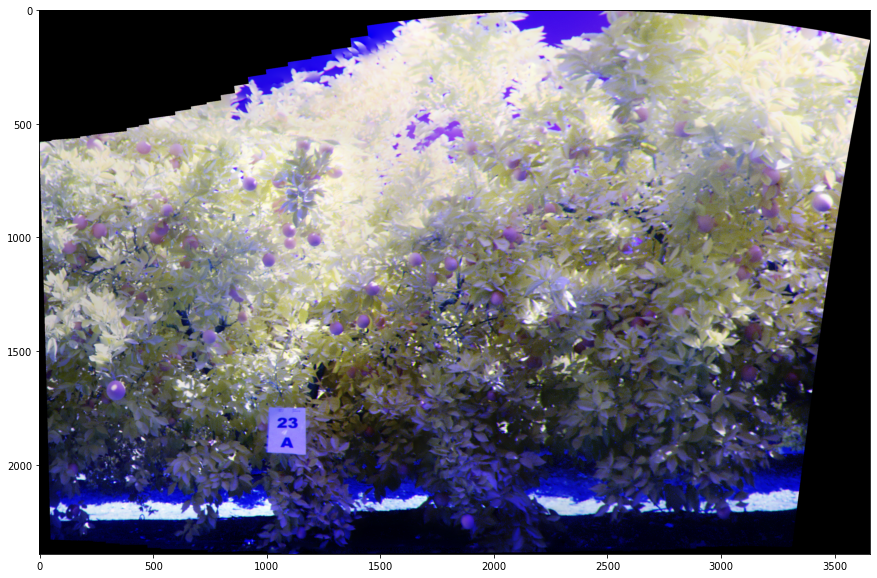

In [86]:
plot_img(r)

In [7]:
fp = r'C:\Users\Matan\Documents\Projects\Data\Slicer\from Roi\RA_3_A_2\RA_3_A_2'
file_list = get_fsi_files(fp)

In [8]:
file_list

['FSI_162.png',
 'FSI_165.png',
 'FSI_168.png',
 'FSI_171.png',
 'FSI_174.png',
 'FSI_177.png',
 'FSI_180.png',
 'FSI_183.png']

In [5]:
images = []
for f in file_list:
    t_img, _ = load_img(os.path.join(fp,f))
    r = min(256 / t_img.shape[0], 256 / t_img.shape[1])
    resized_img = cv2.resize(
            t_img,
            (int(t_img.shape[1] * r), int(t_img.shape[0] * r)),
            interpolation=cv2.INTER_LINEAR,
        ).astype(np.uint8)
    resized_img = cv2.bilateralFilter(resized_img,30,15,15)
    images.append(resized_img)

In [153]:
stitcher = cv2.Stitcher_create()#cv2.Stitcher_PANORAMA)
#stitcher.setPanoConfidenceThresh(0.8)
s,r = stitcher.stitch(images)

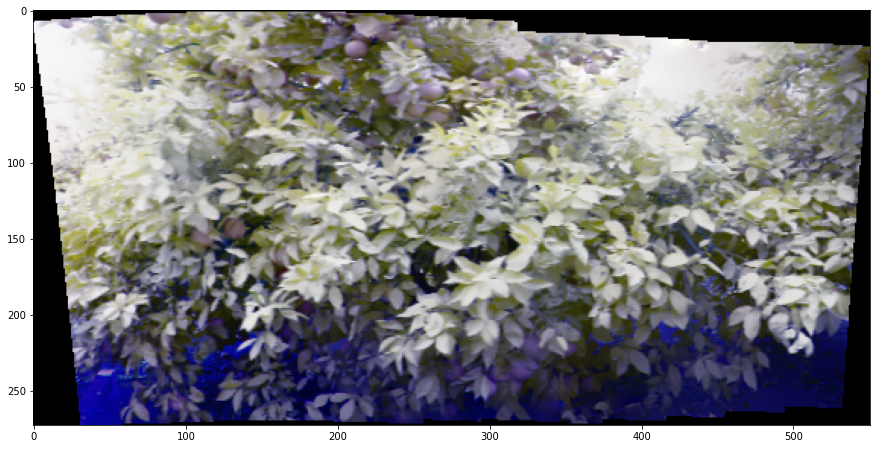

In [154]:
if s==0:
    plot_img(r)
else:
    print(s)

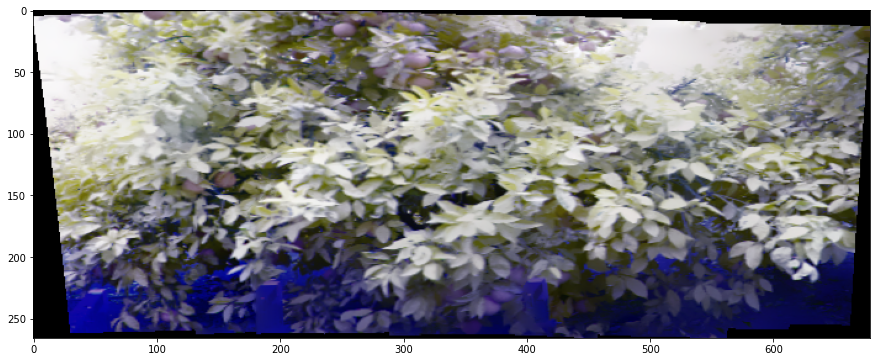

In [128]:
plot_img(bl_r)

In [113]:
bl_r = r.copy()

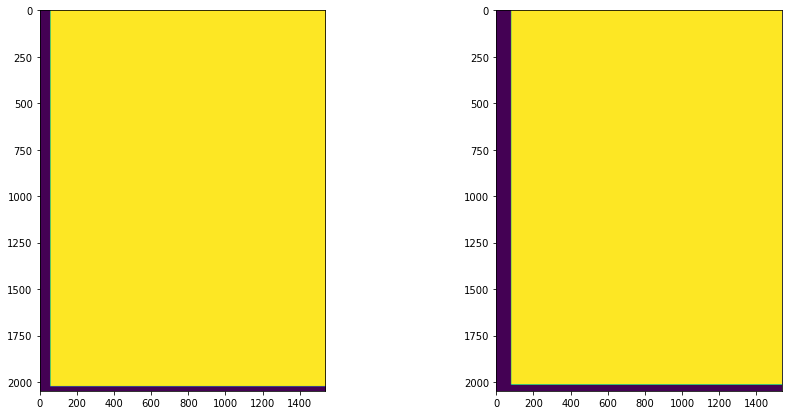

In [3]:
plot_two_img(masks[0], masks[1])

In [ ]:
full_images = images.copy()

In [6]:
from tools.panorama import Panaroma 
#images = full_images[:10]
no_of_images = len(images)
panaroma = Panaroma()
if no_of_images==2:
    (result, matched_points) = panaroma.image_stitch([images[0], images[1]], match_status=True)
else:
    (result, matched_points) = panaroma.image_stitch([images[no_of_images-2], images[no_of_images-1]], match_status=True)
    for i in range(no_of_images - 2):
        (result, matched_points) = panaroma.image_stitch([images[no_of_images-i-3],result], match_status=True)

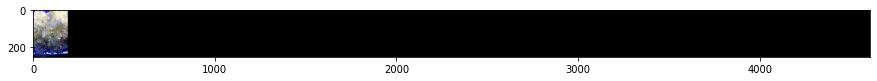

In [9]:
plot_img(result)

In [10]:
trimmed = trim(result)

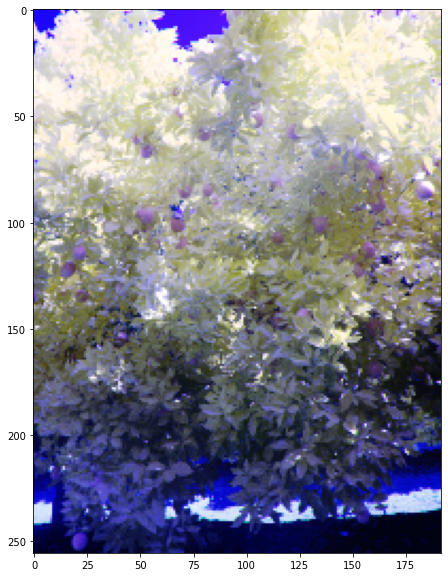

In [11]:
plot_img(trimmed)